<a href="https://colab.research.google.com/github/gitamgadtaula/stock-market-lstm/blob/main/DM2_stock_price_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
# !pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

stock_data = yf.download('AAPL', start='2016-01-01', end='2022-10-01')
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.111496,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.507277,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.047256,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.074554,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.191273,283192000


Text(0, 0.5, 'Prices ($)')

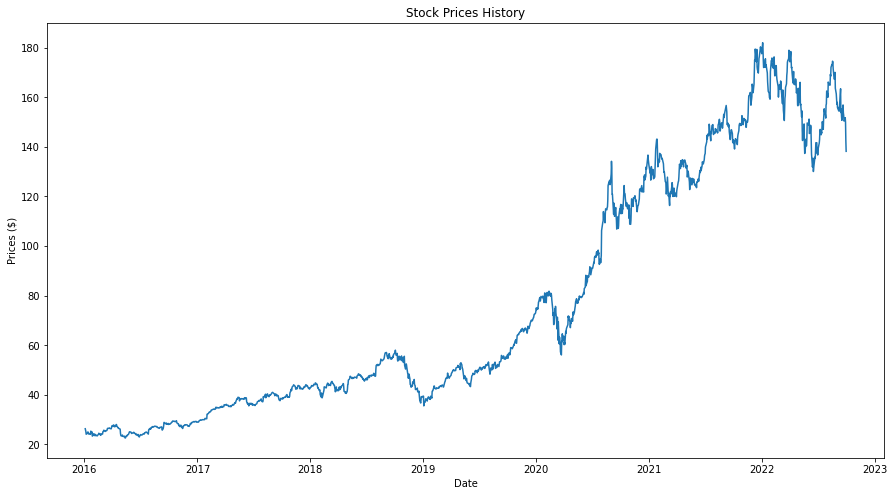

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [ ]:
close_prices = stock_data['Close']
values = close_prices.values
print(values)
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train)
print('_______')
print(y_train)

[ 26.33749962  25.67749977  25.17499924 ... 149.83999634 142.47999573
 138.19999695]
[[[0.02353772]
  [0.01939784]
  [0.01624589]
  ...
  [0.02328682]
  [0.02719148]
  [0.03013957]]

 [[0.01939784]
  [0.01624589]
  [0.00958131]
  ...
  [0.02719148]
  [0.03013957]
  [0.02924573]]

 [[0.01624589]
  [0.00958131]
  [0.01038106]
  ...
  [0.03013957]
  [0.02924573]
  [0.03081387]]

 ...

 [[0.65990281]
  [0.64315513]
  [0.62396112]
  ...
  [0.65689196]
  [0.6450996 ]
  [0.65557474]]

 [[0.64315513]
  [0.62396112]
  [0.61185511]
  ...
  [0.6450996 ]
  [0.65557474]
  [0.65432025]]

 [[0.62396112]
  [0.61185511]
  [0.6199467 ]
  ...
  [0.65557474]
  [0.65432025]
  [0.6540066 ]]]
_______
[0.02924573 0.03081387 0.03258587 ... 0.65432025 0.6540066  0.64415871]


In [ ]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test)
print('______')
print(y_test)

[[[0.61185511]
  [0.6199467 ]
  [0.58820765]
  ...
  [0.65432025]
  [0.6540066 ]
  [0.64415871]]

 [[0.6199467 ]
  [0.58820765]
  [0.61787675]
  ...
  [0.6540066 ]
  [0.64415871]
  [0.63995612]]

 [[0.58820765]
  [0.61787675]
  [0.61091427]
  ...
  [0.64415871]
  [0.63995612]
  [0.63788617]]

 ...

 [[0.74627569]
  [0.75480635]
  [0.77632122]
  ...
  [0.80191311]
  [0.80404585]
  [0.8102556 ]]

 [[0.75480635]
  [0.77632122]
  [0.78064919]
  ...
  [0.80404585]
  [0.8102556 ]
  [0.79821233]]

 [[0.77632122]
  [0.78064919]
  [0.76703779]
  ...
  [0.8102556 ]
  [0.79821233]
  [0.75204642]]]
______
[124.61000061 124.27999878 125.05999756 123.54000092 125.88999939
 125.90000153 126.73999786 127.12999725 126.11000061 127.34999847
 130.47999573 129.63999939 130.1499939  131.78999329 130.46000671
 132.30000305 133.97999573 133.69999695 133.41000366 133.11000061
 134.77999878 136.33000183 136.96000671 137.27000427 139.96000671
 142.02000427 144.57000732 143.24000549 145.11000061 144.5
 145.63999

In [ ]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=10)

Epoch 1/10
1300/1300 [==============================] - 48s 33ms/step - loss: 5.6600e-04
Epoch 2/10
1300/1300 [==============================] - 44s 34ms/step - loss: 4.4354e-04
Epoch 3/10
1300/1300 [==============================] - 46s 35ms/step - loss: 4.4373e-04
Epoch 4/10
1300/1300 [==============================] - 46s 36ms/step - loss: 2.4048e-04
Epoch 5/10
1300/1300 [==============================] - 53s 41ms/step - loss: 3.6119e-04
Epoch 6/10
1300/1300 [==============================] - 52s 40ms/step - loss: 2.1462e-04
Epoch 7/10
1300/1300 [==============================] - 49s 38ms/step - loss: 2.4789e-04
Epoch 8/10
1300/1300 [==============================] - 49s 38ms/step - loss: 2.6492e-04
Epoch 9/10
1300/1300 [==============================] - 45s 35ms/step - loss: 2.5712e-04
Epoch 10/10
1300/1300 [==============================] - 45s 35ms/step - loss: 2.3762e-04


In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

11/11 [==============================] - 0s 29ms/step


8.773435992125565

                 Close
Date                  
2016-01-04   26.337500
2016-01-05   25.677500
2016-01-06   25.174999
2016-01-07   24.112499
2016-01-08   24.240000
...                ...
2022-09-26  150.770004
2022-09-27  151.759995
2022-09-28  149.839996
2022-09-29  142.479996
2022-09-30  138.199997

[1699 rows x 1 columns]
                 Close
Date                  
2016-01-04   26.337500
2016-01-05   25.677500
2016-01-06   25.174999
2016-01-07   24.112499
2016-01-08   24.240000
...                ...
2021-05-21  125.430000
2021-05-24  127.099998
2021-05-25  126.900002
2021-05-26  126.849998
2021-05-27  125.279999

[1360 rows x 1 columns]
                 Close  Predictions
Date                               
2021-05-28  124.610001   121.589104
2021-06-01  124.279999   121.376595
2021-06-02  125.059998   121.077965
2021-06-03  123.540001   120.866058
2021-06-04  125.889999   120.541801
...                ...          ...
2022-09-26  150.770004   145.369629
2022-09-27  151.759995   144

<ipython-input-12-4bddc3a70300>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


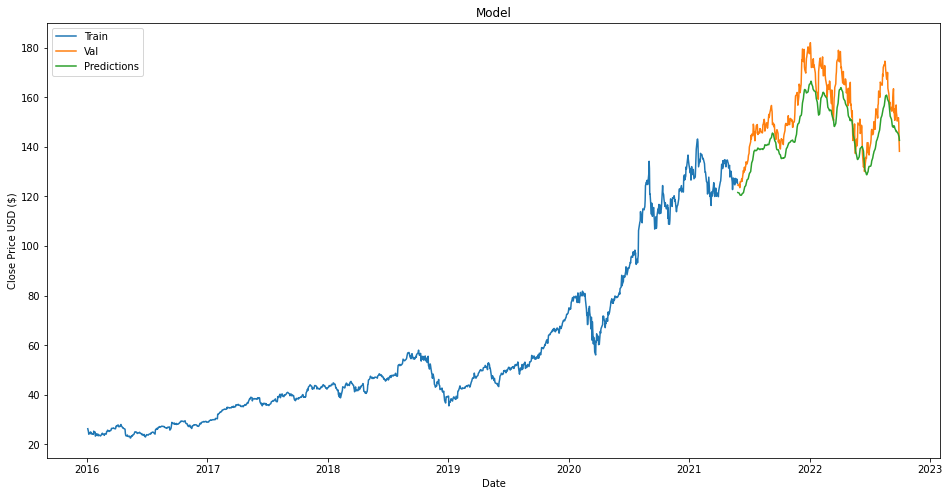

In [ ]:
data = stock_data.filter(['Close'])
print(data)
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
print(train)
print(validation)
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'])
plt.show()

In [ ]:
# model = load_trained_model()

# Define the input sequence
# sequence = [1, 2, 3, 4, 5]

# # Use the model to predict the next n values in the sequence
# predictions = model.predict(test_data,steps=3)

# # Print the predicted values
# print(predictions)

In [ ]:
# predicting future values

# generate the multi-step forecasts
def multi_step_forecasts(n_past, n_future):

    x_past = x_train[- n_past - 1:, :, :][:1]  # last observed input sequence
    y_past = y_train[- n_past - 1]             # last observed target value
    y_future = []                        # predicted target values

    for i in range(n_past + n_future):

        # feed the last forecast back to the model as an input
        x_past = np.append(x_past[:, 1:, :], y_past.reshape(1, 1, 1), axis=1)

        # generate the next forecast
        y_past = model.predict(x_past)

        # save the forecast
        y_future.append(y_past.flatten()[0])

    # transform the forecasts back to the original scale
    y_future = scaler.inverse_transform(np.array(y_future).reshape(-1, 1)).flatten()

    # add the forecasts to the data frame
    df_past = data.rename(columns={'Close': 'Actual'}).copy()

    df_future = pd.DataFrame(
        index=pd.bdate_range(start=data.index[- n_past - 1] + pd.Timedelta(days=1), periods=n_past + n_future),
        columns=['Forecast'],
        data=y_future
    )

    return df_past.join(df_future, how='outer')



1/1 [==============================] - 0s 24ms/step


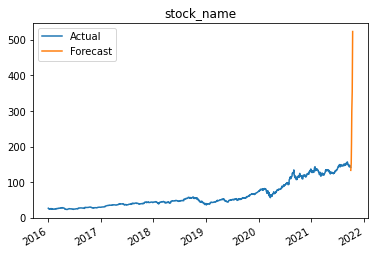

In [ ]:

# forecast the next 30 days
df1 = multi_step_forecasts(n_past=0, n_future=10)
df1.plot(title="stock_name")
